In [1]:
import numpy as np, plottools as pl, cmb, prjlib, tools_qrec, tools_y, binning as bn, curvedsky as cs, basic
from scipy.signal import savgol_filter
from matplotlib.pyplot import *
from scipy.interpolate import interp1d

In [2]:
def obscls(cl,sig,theta,alpha,lmax,ac2rad=np.pi/10800.,Tcmb=2.726e6):
    cl[2,:] *= alpha # delensing 
    l   = np.linspace(0,lmax,lmax+1)
    nl  = np.zeros((4,lmax+1))
    nl[0,:] = (sig*ac2rad/Tcmb)**2 * np.exp(l*(l+1)*(theta*ac2rad)**2/8./np.log(2.))
    nl[1,:] = 2*nl[0,:]
    nl[2,:] = 2*nl[0,:]
    ocl = cl + nl
    ocl[0,3001:] = 1e30 # Tlmax = 3000
    return ocl, nl

In [3]:
lmax  = 4096       # maximum multipole of output normalization
rlmin, rlmax = 100, lmax  # reconstruction multipole range
olmax = 2048
L = np.linspace(0,olmax,olmax+1)

In [4]:
exps = ['S4W','S4D','HD']
labs = ['S4-Wide','S4-Deep','HD']
colors = ['b','g','r']

In [5]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

In [6]:
covEB = {exp: np.sqrt( np.loadtxt('../v4.3/covariance_'+exp+'_y-pico.dat').diagonal()[10:] ) for exp in exps}

In [7]:
#lb, incl = (np.loadtxt('../data/plk/input/forecast_tt_TH_R5.0_a0.0.dat',usecols=(0,1))).T
#ctt = np.concatenate((np.array([0.,0.]),interp1d(lb, incl )(L[2:])))

In [8]:
fclty = np.load('../data/other/clty_fid_alpha_0.npz')
lb    = fclty['l']
incl  = fclty['cl']
clty  = interp1d(lb, lb*(lb+1)*incl/2/np.pi )

In [9]:
#plot(L[100:2001],clty)
#plot(L,ctt*1.7e-6)

13.64948843754093
15.240430417953364
45.127728862371676


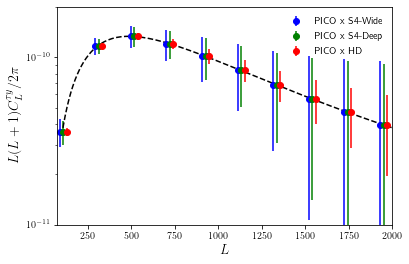

In [11]:
pl.plot_1dstyle(ylab=r'$L(L+1)C^{\tau y}_L/2\pi$',usetex=True,xmin=75,xmax=2000,ymin=1e-11,ymax=2e-10,ylog=True)
s = mb.bc*(mb.bc+1)/2./np.pi
for j, (exp,lab,c) in enumerate(zip(exps,labs,colors)):
    errorbar(mb.bc+20*j-15,clty(mb.bc),yerr=s*covEB[exp],fmt='o',label='PICO x '+lab,color=c)
    print( np.sum((clty(mb.bc)/covEB[exp]/s)**2)**.5 )
plot(L[100:2000],clty(L[100:2000]),color='k',ls='--')
legend()
#savefig('fig_forecast_ty.pdf')